In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
mr_set = pd.read_csv("movieReplicationSet.csv")
mr_set.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),King Kong (1976),The Machinist (2004),A Nightmare on Elm Street (1984),Brazil (1985),The Fast and the Furious (2001),Change of Habit (1969),American Beauty (1999),Psycho (1960),Terminator 3: Rise of the Machines (2003),Night of the Living Dead (1968),Man on Fire (2004),Star Wars: Episode IV - A New Hope (1977),The Silence of the Lambs (1991),The Others (2001),Minority Report (2002),Sling Blade (1996),Schindler's List (1993),3000 Miles to Graceland (2001),Magnolia (1999),The Karate Kid Part II (1986),Planet of the Apes (2001),The Godfather: Part II (1974),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),The Iron Giant (1999),The Matrix Revolutions (2003),North (1994),The Lost World: Jurassic Park (1997),The Texas Chainsaw Massacre (1974),Taxi Driver (1976),Back to the Future (1985),13 Going on 30 (2004),Sorority Boys (2002),The Bridges of Madison County (1995),Billy Madison (1995),Chain Reaction (1996),Batman & Robin (1997),Jurassic Park III (2001),Platoon (1986),Signs (2002),Terms of Endearment (1983),Mission: Impossible II (2000),Lost in Translation (2003),Star Trek: The Motion Picture (1979),Inglorious Bastards (2009),Clueless (1995),The Omen (1976),Shrek 2 (2004),Good Will Hunting (1997),Just Like Heaven (2005),Showgirls (1995),Diamonds are Forever (1971),Crossroads (2002),Pieces of April (2003),Torque (2004),Poltergeist (1982),Fear and Loathing in Las Vegas (1998),Barbarella (1968),The King of Marvin Gardens (1972),The Poseidon Adventure (1972),The Rock (1996),Love Story (1970),The Last Samurai (2003),The Jungle Book (1967),The Exorcist (1973),Pirates of the Caribbean: Dead Man's Chest (2006),Gone in Sixty Seconds (2000),Funny Girl (1968),Honey (2003),Blues Brothers 2000 (1998),Avatar (2009),The Pianist (2002),Godzilla (1998),Fight Club (1999),The Conjuring (2013),Top Gun (1986),Slackers (2002),Shrek (2001),12 Monkeys (1995),From Hell (2001),Dead Poets Society (1989),Once Upon a Time in America (1984),Equilibrium (2002),Star Wars: Episode II - Attack of the Clones (2002),The Thing (1982),Interstellar (2014),Full Metal Jacket (1987),Big Fish (2003),Cool Hand Luke (1967),A Beautiful Mind (2001),Sholay (1978),The 51st State (2001),Die Hard With a Vengeance (1995),Elf (2003),The Blue Lagoon (1980),Hellraiser (1987),Moonraker (1979),Leon (1994),Mystic River (2003),Sexy Beast (2000),Beetle Juice (1988),Andaz Apna Apna (1994),The Proposal (2009),The Shining (1980),The Land That Time Forgot (1974),The Perfect Storm (2000),Escape from LA (1996),Shutter Island (2010),JFK (1991),Barb Wire (1996),Oldboy (2003),Carrie (1976),The Good the Bad and the Ugly (1966),Speed 2: Cruise Control (1997),The Lord of the Rings: The Fellowship of the Ring (2001),The Talented Mr. Ripley (1999),Casino (1995),A Time to Kill (1996),Blazing Saddles (1974),The Doom Generation (1995),Armageddon (1998),X-Men (2000),Arachnophobia (1990),Stir Crazy (1980),Billy Jack (1971),The Silencers (1966),The Three Musketeers (1993),Girl Interrupted (1999),Finding Nemo (2003),Tropic of Cancer (1970),The Sixth Sense (1999),I Know What You Did Last Summer (1997),Indiana Jones and the Kingdom of the Crystal Skull (2008),Divine Secrets of the Ya-Ya Sisterhood (2002),Ace Ventura: When Nature Calls (1995),Dances with Wolves (1990),Date and Switch (2014),The Intouchables (2011),Mrs. Doubtfire (1993),Ghostbusters (2016),Almost Famous (2000),Blade Runner (1982),Unforgiven (1992),Rosemary's Baby (1968),Cheaper by the Dozen (2003),Can't Hardly Wait (1998),Die Another Day (2002),Toy Story 2 (1999),Transformers: Age of Extinction (2014),Like Stars on Earth (2007),Terminator 2: Judgement Day (1991),25th Hour (2002),Who's Afraid of Virginia Woolf (1966),Adaption (2002),Life is Beautiful (1997),Room (2015)

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Q5

#### BE CAREFUL! The question is: Do people who are only children enjoy ‘The Lion King (1994)’ MORE than people with siblings? <br>
#### Since it asks "MORE," this must be an one-sided test

#### Null Hypothesis: only children do not enjoy "The Lion King(1994)" more than people with siblings<br>
#### Alternative Hypothesis: people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings

In [114]:
# Sum Up Cell
signi_level = 0.005
# Firstly extract the columns we need to use.
lion_k = mr_set.loc[:, ["The Lion King (1994)", "Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]]
# Split the data into two categories and only keep the series of the ratings, and also dropna.
lion_k_OC = lion_k.query("`Are you an only child? (1: Yes; 0: No; -1: Did not respond)` == 1").dropna()["The Lion King (1994)"]
lion_k_HS = lion_k.query("`Are you an only child? (1: Yes; 0: No; -1: Did not respond)` == 0").dropna()["The Lion King (1994)"]
# Lastly do the ONE-sided independent samples t-test.
stat, pval = stats.ttest_ind(lion_k_OC, lion_k_HS, alternative="greater")
whether_significant = 'significant!' if pval < signi_level else 'not significant!'
print(f"The p-value for the t-test is {pval}, which means that the result is {whether_significant}")

The p-value for the t-test is 0.9798664723686588, which means that the result is not significant!


#### A visualization might be persuasive

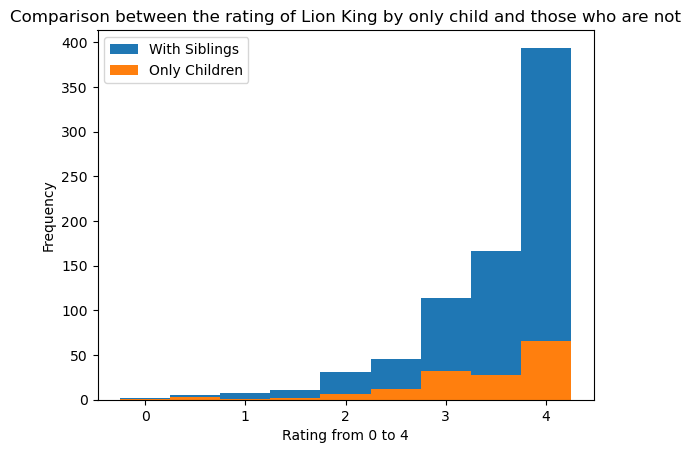

In [101]:
# We must properly define bins such that the graph is easy to understand
bins = np.arange(-0.25, 4.75, 0.5)
# It is convenient to compare their distribution in a single graph.
plt.hist(lion_k_HS, bins=bins, label='Have Siblings')
plt.hist(lion_k_OC, bins=bins, label='Only Children')
plt.xlabel('Rating from 0 to 4')
plt.ylabel('Frequency')
plt.title('Comparison between the rating of Lion King by only child and those who are not')
plt.legend()
plt.show()

#### We can make our conclusion: only children do not enjoy "The Lion King(1994)" more than people with siblings (Do not reject Null Hypothesis).

# Q6

#### In this question we are doing two-sided test

In [115]:
# In this question we may firstly split the whole dataset into to categories, then get the movie names.
data_child_OC = mr_set.query("`Are you an only child? (1: Yes; 0: No; -1: Did not respond)` == 1")
data_child_HS = mr_set.query("`Are you an only child? (1: Yes; 0: No; -1: Did not respond)` == 0")
movie_names = list(mr_set.columns[:400])

In [116]:
# Go over all movies and do an independent samples t-test for each of them.
signi_level = 0.005
count_sig, count_not_sig = 0, 0
for each_movie in movie_names:
    movie_OC = data_child_OC[each_movie].dropna()
    movie_HS = data_child_HS[each_movie].dropna()
    each_stat, each_pval = stats.ttest_ind(movie_OC, movie_HS)
    if each_pval < signi_level:
        count_sig += 1
    else:
        count_not_sig += 1
print(f"Among the 400 movies, {count_sig/400 :.2%}({count_sig} movies) exhibit an “only child effect”,\
 and {count_not_sig/400 :.2%}({count_not_sig} movies) do not exhibit an “only child effect”")

Among the 400 movies, 2.50%(10 movies) exhibit an “only child effect”, and 97.50%(390 movies) do not exhibit an “only child effect”


#### Among the 400 movies, 2.50%(10 movies) exhibit an “only child effect”, and 97.50%(390 movies) do not exhibit an “only child effect”

# Q7

#### Also be careful since it asks "MORE," this must be an one-sided test.

#### Null Hypothesis: people who like to watch movies socially do not enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone.
#### Alternative Hypothesis: people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those wh prefer to watch them alone

In [117]:
# Sum Up Cell
# Repeaing my code for Q5
signi_level = 0.005
# Firstly extract the columns we need to use.
wolf_ws = mr_set.loc[:, ["The Wolf of Wall Street (2013)", "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]]
# Split the data into two categories and only keep the series of the ratings, and also dropna.
wolf_ws_AL = wolf_ws.query("`Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)` == 1").dropna()["The Wolf of Wall Street (2013)"]
wolf_ws_SO = wolf_ws.query("`Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)` == 0").dropna()["The Wolf of Wall Street (2013)"]
# Lastly do the ONE-sided independent samples t-test.
stat, pval = stats.ttest_ind(wolf_ws_SO, wolf_ws_AL, alternative="greater")
whether_significant = 'significant!' if pval < signi_level else 'not significant!'
print(f"The p-value for the t-test is {pval}, which means that the result is {whether_significant}")

The p-value for the t-test is 0.9413054316716771, which means that the result is not significant!


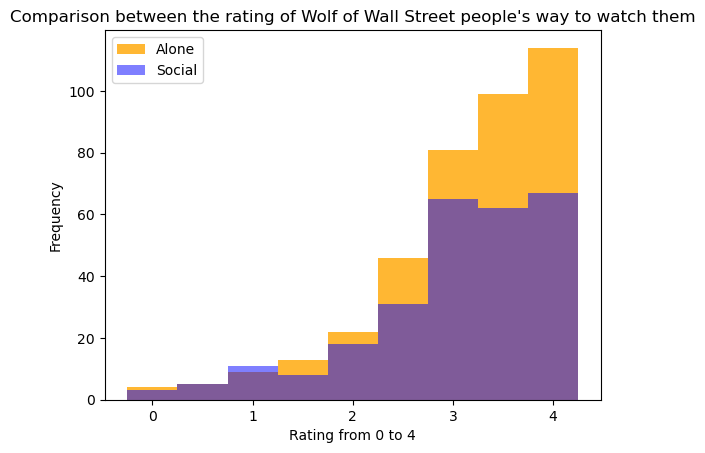

In [118]:
# We must properly define bins such that the graph is easy to understand
bins = np.arange(-0.25, 4.75, 0.5)
# It is convenient to compare their distribution in a single graph.
plt.hist(wolf_ws_AL, bins=bins, label='Alone', alpha=0.8, color="orange")
plt.hist(wolf_ws_SO, bins=bins, label='Social', alpha=0.5, color="blue")
plt.xlabel('Rating from 0 to 4')
plt.ylabel('Frequency')
plt.title('Comparison between the rating of Wolf of Wall Street people\'s way to watch them')
plt.legend()
plt.show()

#### We can make our conclusion: people who like to watch movies socially do not enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone. (Do not reject Null Hypothesis).

# Q8

#### In this question we are doing two-sided test

In [119]:
# In this question we may firstly split the whole dataset into to categories, then get the movie names.
data_watch_AL = mr_set.query("`Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)` == 1")
data_watch_SO = mr_set.query("`Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)` == 0")
movie_names = list(mr_set.columns[:400])

In [120]:
# Go over all movies and do an independent samples t-test for each of them.
signi_level = 0.005
count_sig, count_not_sig = 0, 0
for each_movie in movie_names:
    movie_watch_AL = data_watch_AL[each_movie].dropna()
    movie_watch_SO = data_watch_SO[each_movie].dropna()
    each_stat, each_pval = stats.ttest_ind(movie_watch_AL, movie_watch_SO)
    if each_pval < signi_level:
        count_sig += 1
    else:
        count_not_sig += 1
print(f"Among the 400 movies, {count_sig/400 :.2%}({count_sig} movies) exhibit a “social watching”,\
 and {count_not_sig/400 :.2%}({count_not_sig} movies) do not exhibit a “social watching”")

Among the 400 movies, 1.50%(6 movies) exhibit a “social watching”, and 98.50%(394 movies) do not exhibit a “social watching”


#### Among the 400 movies, 1.50%(6 movies) exhibit a “social watching”, and 98.50%(394 movies) do not exhibit a “social watching”